# Chapter 12: Multiobjective Optimization

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Algorithm 12.1

In [8]:
def dominates(y, y_prime):
    return np.all(np.where(y <= y_prime, True, False)) and np.any(np.where(y < y_prime,True, False))

## Algorithm 12.2

In [ ]:
def naive_pareto(xs, ys):
    pareto_xs, pareto_ys = np.zeros_like(xs), np.zeros_like(ys)
    for x, y in zip(xs, ys):
        if not np.any([dominates(y_prime, y) for y_prime in ys]):
            pareto_xs = np.append(pareto_xs, x)
            pareto_ys = np.append(pareto_ys, y)
    
    return pareto_xs, pareto_ys

## Algorithm 12.3

In [21]:
def weight_pareto(f1, f2, npts):
    return [ minimize(lambda x: w1*f1(x)+(1-w1)*f2(x), 1) for w1 in np.arange(0,1,npts)]

### Example

Text(0, 0.5, '$f_2(x)$')

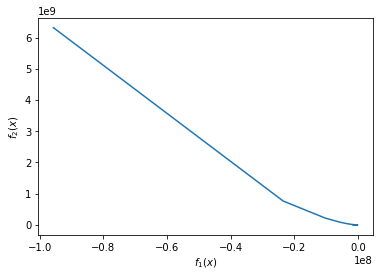

In [32]:
f1 = lambda x:-x**2 - .3*x**2 - x
f2 = lambda x: x + .01*x**3

npts = 0.01

points = weight_pareto(f1,f2, npts)

xs = [f1(p.x) for p in points]
ys = [f2(p.x) for p in points]

plt.plot(xs,ys)
plt.xlabel(f"$f_1(x)$")
plt.ylabel(f"$f_2(x)$")